In [35]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=3,              # input height
                out_channels=24,            # n_filters
                kernel_size=[5,7],              # filter size
                stride=1,                   # filter movement/step
                padding=[2,3],                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=5),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(24, 48, [5,7], 1, [2,3]),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(5),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(48 * 6 * 8, 32)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return nn.functional.log_softmax(output,dim=1)    # return x for visualization
model = CNN().to(device)
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=[5, 7], stride=(1, 1), padding=[2, 3])
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(24, 48, kernel_size=[5, 7], stride=(1, 1), padding=[2, 3])
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2304, out_features=32, bias=True)
)


In [37]:
model = torch.load('model.pkl').cuda()

In [54]:
dir = 'characterDatasets/val/x/01152584.jpg'

In [55]:
data_transform_val = transforms.Compose([
        transforms.Resize([200,150]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

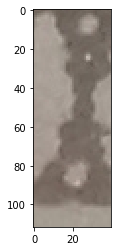

In [56]:
image = Image.open(dir)
plt.imshow(image)

In [57]:
img = data_transform_val(image)
img = img.unsqueeze(0)

In [58]:
model.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=[5, 7], stride=(1, 1), padding=[2, 3])
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(24, 48, kernel_size=[5, 7], stride=(1, 1), padding=[2, 3])
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2304, out_features=32, bias=True)
)

In [59]:
var = torch.autograd.Variable(img.cuda())


In [60]:
result = model(var)
print(result)

tensor([[-1.0722e+01, -7.6960e+00, -4.7684e-04, -2.6346e+01, -2.6297e+01,
         -2.6413e+01, -2.6064e+01, -2.6449e+01, -2.6751e+01, -2.5745e+01,
         -2.6513e+01, -2.5871e+01, -2.6753e+01, -2.7375e+01, -2.6790e+01,
         -2.6937e+01, -2.6633e+01, -2.5610e+01, -2.6450e+01, -2.5593e+01,
         -2.6556e+01, -2.6858e+01, -2.7102e+01, -2.5858e+01, -2.6166e+01,
         -2.6834e+01, -2.6538e+01, -2.6770e+01, -2.7151e+01, -2.6023e+01,
         -2.5007e+01, -2.6332e+01]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward>)


In [61]:
probability = torch.nn.functional.softmax(result,dim=1)#计算softmax，即该图片属于各类的概率
max_value,index = torch.max(probability,1)#找到最大概率对应的索引号，该图片即为该索引号对应的类别
print(index)

tensor([2], device='cuda:0')


In [ ]:
#0代表字符
#1代表数字
#2代表字母